 Calling the required python libraries for processing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [54]:
import csv

with open("income.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("income.csv")

df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,323773,11th,7,Married-civ-spouse,Priv-house-serv,Other-relative,White,Female,0,0,40,United-States,<=50K
1,48,Private,175070,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,2258,40,United-States,>50K
2,48,Self-emp-not-inc,51620,Bachelors,13,Separated,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
3,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
4,44,Self-emp-inc,168845,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,60,United-States,<=50K


In [4]:
#calculating rows and columns
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  2000
Number of columns:  15


In [5]:
#type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
age               2000 non-null int64
workclass         2000 non-null object
fnlwgt            2000 non-null int64
education         2000 non-null object
education.num     2000 non-null int64
marital.status    2000 non-null object
occupation        2000 non-null object
relationship      2000 non-null object
race              2000 non-null object
sex               2000 non-null object
capital.gain      2000 non-null int64
capital.loss      2000 non-null int64
hours.per.week    2000 non-null int64
native.country    2000 non-null object
income            2000 non-null object
dtypes: int64(6), object(9)
memory usage: 234.5+ KB


In [6]:
#calculate the numerical variable
num_var = df.select_dtypes(exclude='object').columns
print('Continous variables: ', num_var)

Continous variables:  Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [7]:
#calculating the categorical variable
cat_var = df.select_dtypes(include=['object']).columns
print('Categorical variables: ', cat_var)

Categorical variables:  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [8]:
#counting the occurance of target variable
df.income.value_counts()

<=50K    1532
>50K      468
Name: income, dtype: int64

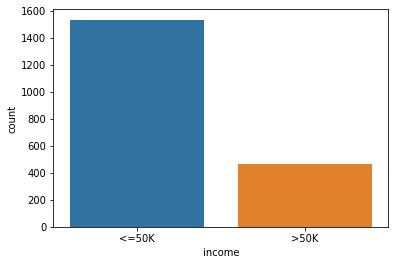

In [10]:
#representing the target variable using Axesplot
sns.countplot(df.income)

Here we can assume that the target variable is incom where the data is sort of imbalaced with 1532 and 468 partations

In [12]:
#understanding the summary of data
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,2000.000000,2000,2000.000000,2000,2000.000000,2000,2000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000,2000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,36,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,1389,NaN,623,NaN,906,243,804,1713,1323,NaN,NaN,NaN,1811,1532
mean,38.676500,NaN,187979.847500,NaN,10.065500,NaN,NaN,NaN,NaN,NaN,1261.799000,83.034500,40.316000,NaN,NaN
std,13.713055,NaN,104959.530657,NaN,2.578475,NaN,NaN,NaN,NaN,NaN,8398.998049,388.689399,12.239732,NaN,NaN
min,17.000000,NaN,19214.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,27.000000,NaN,114627.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,174642.500000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,235881.750000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [15]:
#percentage observations:::
for i in cat_var:
   print(i,'\n',df[i].value_counts(normalize=True).mul(100).round(2).astype(str)+'%','\n')

workclass 
 Private             69.45%
Local-gov             7.5%
Self-emp-not-inc     7.05%
?                     5.9%
State-gov            3.95%
Self-emp-inc          3.6%
Federal-gov           2.5%
Never-worked         0.05%
Name: workclass, dtype: object 

education 
 HS-grad         31.15%
Some-college     23.2%
Bachelors        17.6%
Masters           4.8%
Assoc-voc         4.3%
11th             3.75%
Assoc-acdm       3.65%
10th             3.05%
7th-8th           2.1%
9th               1.3%
Prof-school       1.3%
5th-6th          1.15%
Doctorate         1.1%
12th              0.7%
1st-4th          0.65%
Preschool         0.2%
Name: education, dtype: object 

marital.status 
 Married-civ-spouse        45.3%
Never-married            33.35%
Divorced                  13.4%
Separated                  3.3%
Widowed                    3.1%
Married-spouse-absent     1.45%
Married-AF-spouse          0.1%
Name: marital.status, dtype: object 

occupation 
 Exec-managerial      12.15%
Prof-s

In [17]:
#counting the number of unique value 
print(df.workclass.nunique())
print(df.education.nunique())
print(df['marital.status'].nunique())
print(df.occupation.nunique())
print(df.relationship.nunique())
print(df.race.nunique())
print(df.sex.nunique())
print(df['native.country'].nunique())

8
16
7
14
6
5
2
36


DATA PREPROCESSING STAGE

Checking for defects in the data. Perform necessary actions to ‘fix’ these defects 

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [19]:
#calculating sum of null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

* There are no null values in the data set where the whole data set is clean in such way

age


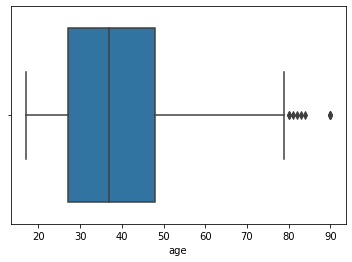

fnlwgt


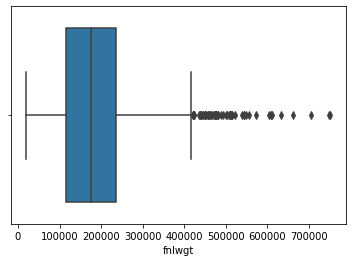

education.num


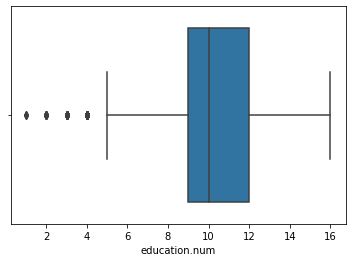

capital.gain


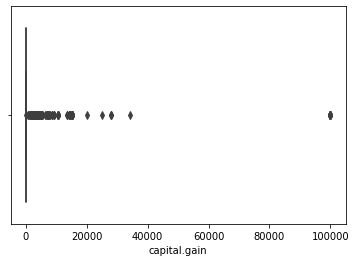

capital.loss


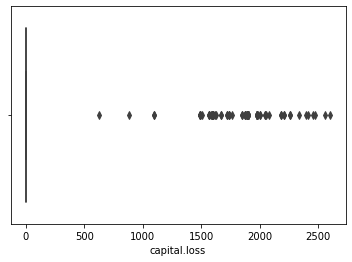

hours.per.week


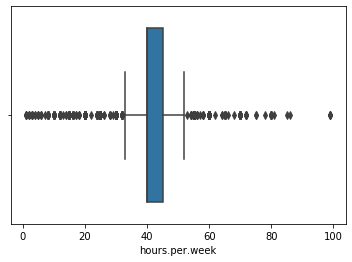

In [20]:
#Checking outliers and represented using box and whisker graph
for i in num_var:
    sns.boxplot(df[i])
    print(i)
    plt.show()

There are  outiers in the dataset


#### 3C

In [25]:
#understanding the occurance of income
print(df['income'].value_counts()/len(df))

<=50K    0.766
>50K     0.234
Name: income, dtype: float64


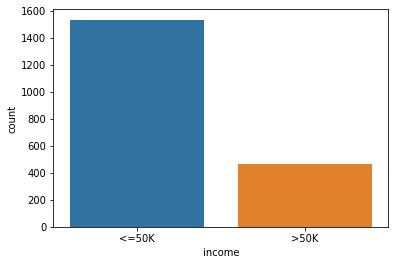

In [27]:
#target variable representation 
sns.countplot(df.income)

here income variable of 2 catagories are 76% and 23 %.so the data is not actually fully imbalanced.

Summarizing relationships among variables   

Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


Plot all independent variables with the target & find out the relationship and find whether the Independent variables are associated with the Target Variable.

 

In [55]:
#making copy of original dataset
df1=df.copy()

In [56]:
#checking columns
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [57]:
#count the value of target class
df1.income.value_counts()

<=50K    1532
>50K      468
Name: income, dtype: int64

In [58]:
#replacing target variable into numeric 
df1['income'] = df1['income'].replace({'<=50K':1, '>50K':0})

In [59]:
#encoded version of target variable
pd.to_numeric(df1.income)

0       1
1       0
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      0
11      1
12      0
13      1
14      0
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      0
33      1
34      1
35      1
36      1
37      0
38      1
39      0
40      1
41      1
42      0
43      1
44      1
45      1
46      1
47      1
48      1
49      0
50      1
51      1
52      0
53      1
54      1
55      1
56      0
57      1
58      1
59      1
60      1
61      1
62      0
63      1
64      1
65      1
66      1
67      1
68      1
69      0
70      1
71      1
72      1
73      0
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      0
85      1
86      1
87      1
88      1
89      1
90      0
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [60]:
#knowing the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
age               2000 non-null int64
workclass         2000 non-null object
fnlwgt            2000 non-null int64
education         2000 non-null object
education.num     2000 non-null int64
marital.status    2000 non-null object
occupation        2000 non-null object
relationship      2000 non-null object
race              2000 non-null object
sex               2000 non-null object
capital.gain      2000 non-null int64
capital.loss      2000 non-null int64
hours.per.week    2000 non-null int64
native.country    2000 non-null object
income            2000 non-null int64
dtypes: int64(7), object(8)
memory usage: 234.5+ KB


In [61]:
#understanding correlation between columns
df1.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.093936,0.032673,0.074033,0.077915,0.069332,-0.229606
fnlwgt,-0.093936,1.000000,-0.069638,0.020829,-0.020996,-0.025807,0.005839
education.num,0.032673,-0.069638,1.000000,0.114972,0.099557,0.162005,-0.323144
capital.gain,0.074033,0.020829,0.114972,1.000000,-0.032110,0.085657,-0.230818
capital.loss,0.077915,-0.020996,0.099557,-0.032110,1.000000,0.056961,-0.149766
hours.per.week,0.069332,-0.025807,0.162005,0.085657,0.056961,1.000000,-0.219867
income,-0.229606,0.005839,-0.323144,-0.230818,-0.149766,-0.219867,1.000000


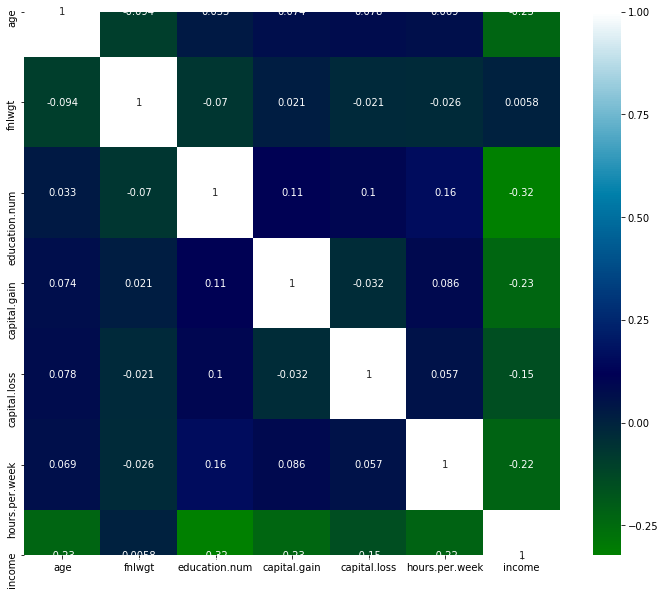

In [62]:
#correlation matrix represented using heatmap
plt.figure(figsize=(12,10))
en_no = sns.heatmap(df1.corr(), annot=True,cmap='ocean')
plt.show()

From the graph and corelation value we can see a variable(fnwlt-final weight) has very less impact on the target variable.so we can drop that variable

In [63]:
#making copy 
df2=df1.copy()

In [64]:
#droping column that has less impact on target variable
df1.drop(columns=['fnlwgt','native.country'],inplace=True,axis=1)

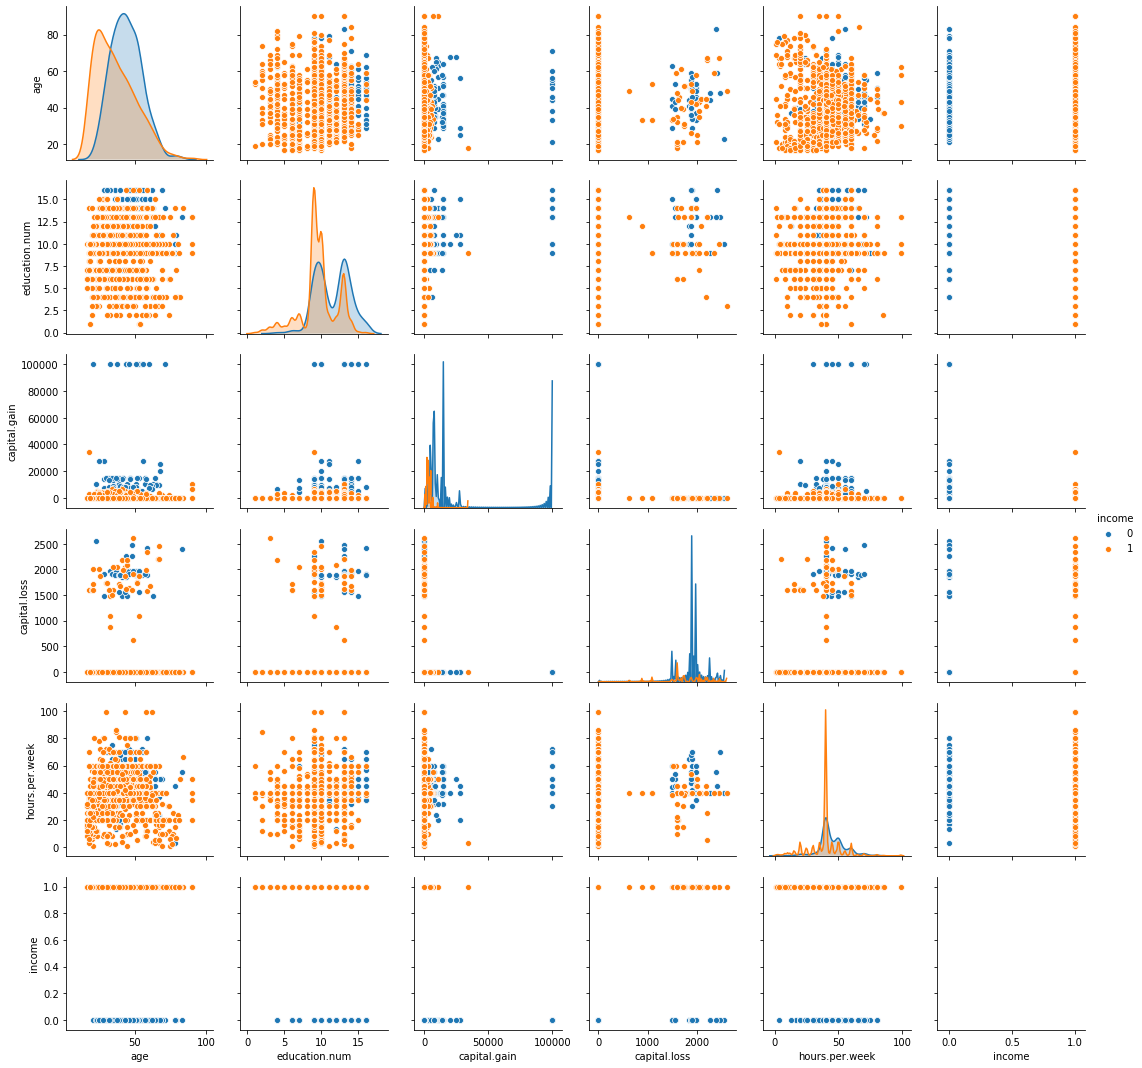

In [14]:
#represented using pairplot
sns.pairplot(df2,hue='income')

from the pair graph we can see that some of the variables have some relation with other features.

Split dataset into train and test (70:30)


In [65]:
#dummy variable created for categorical cariable
df2=pd.get_dummies(data=df2,columns=['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex'],drop_first=True)

In [66]:
#returns the shape of dataframe
df2.shape

(2000, 59)

In [67]:
#contain all columns expect target
X=df2.drop('income', axis=1)
#stores target variable
y=df2['income']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)

In [70]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1400, 58) (600, 58)
(1400,) (600,)


Fit a base model and explain the reason of selecting that model

finding the overall Accuracy

variables that are significant determined after doing feature selection?

Understanding the model performance using Cohen’s Kappa Value 


In [21]:
#considering logistic regression as base fit model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, solver='liblinear') 

In [22]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = lr.predict(X_test)

In [25]:
#determining all the classification report
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score, f1_score, classification_report

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
print('Training set accuracy: {:.3f}'.format(lr.score(X_train,y_train)))
print('Test set accuracy: {:.3f}'.format(lr.score(X_test,y_test)))
print('roc_auc: ', metrics.roc_auc_score(y_test,y_pred))
print('f1_score: ', f1_score(y_test,y_pred))
print('Precision: ', metrics.precision_score(y_test,y_pred))
print('Recall: ', metrics.recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8316666666666667
Training set accuracy: 0.857
Test set accuracy: 0.832
roc_auc:  0.727282345090252
f1_score:  0.8944618599791012
Precision:  0.8770491803278688
Recall:  0.9125799573560768
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       131
           1       0.88      0.91      0.89       469

    accuracy                           0.83       600
   macro avg       0.76      0.73      0.74       600
weighted avg       0.82      0.83      0.83       600



As we can see from the above result accuracy is 83%

In [26]:
#feature selection using Recursive Feature Elimination
from sklearn.feature_selection import RFECV, RFE
lr=LogisticRegression()

In [27]:
rfecv = RFECV(estimator=lr, step=1, scoring='roc_auc')
rfecv.fit(X,y)
print('Optimall number of features: %d' % rfecv.n_features_)

Optimall number of features: 56


In [28]:
X.columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupati

* Age is one of the most signicicant column

In [38]:
#to understand the model performance
metrics.cohen_kappa_score(y_test,y_pred)

0.4796317922648897

Cohen kappa score is a statistic that is used to easure inter rater realibility for qualitive items. It is generally thought to be a more robust measure than simple percent agreement calculation, as k takes into account the possibility of the aggrement ocuring by chance

Working on different models to improve overall efficiency of the model and select the best one while comparing with base fit model 


Confusion matrix - train dataset: 
 [[201 136]
 [ 64 999]]
Overall accuracy of model - train dataset: 0.8571428571428571
AUC Score - train dataset: 0.9086315812981008


Confusion matrix - test dataset: 
 [[ 71  60]
 [ 41 428]]
Overall accuracy of model - test dataset: 0.8316666666666667
AUC Score - test dataset: 0.8682514363840557


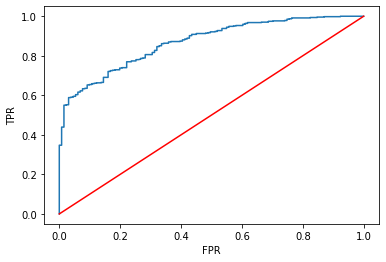

In [44]:
#Logistic regression:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, solver='liblinear') 

lr.fit(X_train, y_train) 

y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1] #slicing: all rows, second col as only we need second row

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Confusion matrix - train dataset: 
 [[ 337    0]
 [   2 1061]]
Overall accuracy of model - train dataset: 0.9985714285714286
AUC Score - train dataset: 0.9999944170102532


Confusion matrix - test dataset: 
 [[ 76  55]
 [ 63 406]]
Overall accuracy of model - test dataset: 0.8033333333333333
AUC Score - test dataset: 0.7223994531160989


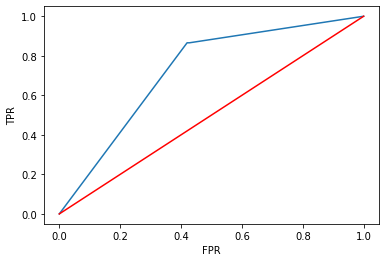

In [45]:
# Decision Tree
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train) 

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Confusion matrix - train dataset: 
 [[1062    1]
 [   1 1062]]
Overall accuracy of model - train dataset: 0.9990592662276576
AUC Score - train dataset: 0.9999982300399392


Confusion matrix - test dataset: 
 [[ 75  56]
 [ 61 408]]
Overall accuracy of model - test dataset: 0.805
AUC Score - test dataset: 0.8358778625954197


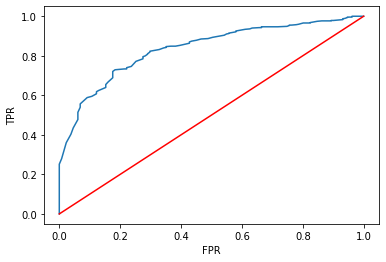

In [46]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_sm, y_train_sm) 

y_train_pred = rfc.predict(X_train_sm)
y_train_prob = rfc.predict_proba(X_train_sm)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train_sm, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train_sm, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train_sm, y_train_prob))

print('\n')

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [47]:
# LightGBM Classifier

import lightgbm as lgb

lgbm = lgb.LGBMClassifier()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

params = {'n_estimators' : sp_randint(50,200),
         'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.001, 0.5), #default is 0.1
         'num_leaves' : sp_randint(20,50)} #default is 31

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200,\
                  n_jobs=-1, random_state=3)

rsearch.fit(X,y)

rsearch.best_params_

{'learning_rate': 0.06133753353445359,
 'max_depth': 8,
 'n_estimators': 65,
 'num_leaves': 28}

Confusion matrix - train dataset: 
 [[ 236  101]
 [  35 1028]]
Overall accuracy of model - train dataset: 0.9028571428571428
AUC Score - train dataset: 0.9616434646917771


Confusion matrix - test dataset: 
 [[ 71  60]
 [ 36 433]]
Overall accuracy of model - test dataset: 0.84


Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.66      0.54      0.60       131
           1       0.88      0.92      0.90       469

    accuracy                           0.84       600
   macro avg       0.77      0.73      0.75       600
weighted avg       0.83      0.84      0.83       600

AUC Score - test dataset: 0.8731506046647894


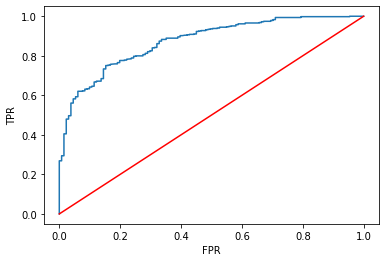

In [48]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)

lgbm.fit(X_train, y_train) 

y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]

print('Confusion matrix - train dataset:', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall accuracy of model - train dataset:', accuracy_score(y_train, y_train_pred))
print('AUC Score - train dataset:', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]

print('Confusion matrix - test dataset:', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall accuracy of model - test dataset:', accuracy_score(y_test, y_test_pred))
print('\n')
print('Classification Report - Test : ', '\n', classification_report(y_test, y_test_pred)) 
print('AUC Score - test dataset:', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

* done(logistic,lgbm,decision tree,random forest).
* from all the above modeling logistic regression and lightgbm is giving the best Auc score of 87 percentage.

The overall fit of the model and list down the measures to prove that it is a good model

* The overall performace of the model is good, as the accuracy was close to 87%.
* Various measures can be taken to support the model: precision, recall, f1_score, accuracy_score.
* We have quite generalized model here as we can see by the AUC score.

As in the inital part itself we can see that in the heatmap that most of the continous variables are related to the target variable

In [71]:
df1.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.032673,0.074033,0.077915,0.069332,-0.229606
education.num,0.032673,1.000000,0.114972,0.099557,0.162005,-0.323144
capital.gain,0.074033,0.114972,1.000000,-0.032110,0.085657,-0.230818
capital.loss,0.077915,0.099557,-0.032110,1.000000,0.056961,-0.149766
hours.per.week,0.069332,0.162005,0.085657,0.056961,1.000000,-0.219867
income,-0.229606,-0.323144,-0.230818,-0.149766,-0.219867,1.000000


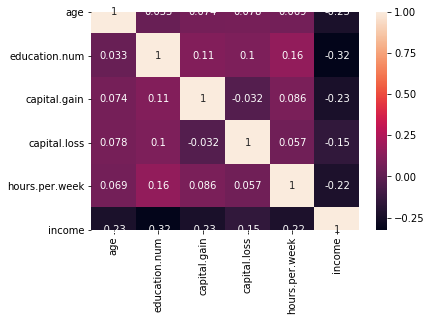

In [72]:
sns.heatmap(df1.corr(),annot=True)

* None of the features have a strong correlation with the target variable but some have light relation.